In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_conv_model2, get_vector_conv_model2, get_le_net_5, get_le_net_5_without_fully_connected, get_le_net_5_fractal1, get_le_net_5_fractal2, get_le_net_5_fractal3, get_le_net_5_fractal4, get_le_net_5_fractal5, get_le_net_5_fractal6
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
train_dataset, test_dataset = get_test_datasets('mnist', random_seed=200, feature_range=(0,1))
datasets_generator_fun = lambda: get_validation_datasets('mnist', random_seed=200, feature_range=(0,1))
dataset_shapes = get_dataset_shapes('mnist')

dataset_shapes

([28, 28, 1], [10])

### Scalar ConvNet C-C-P

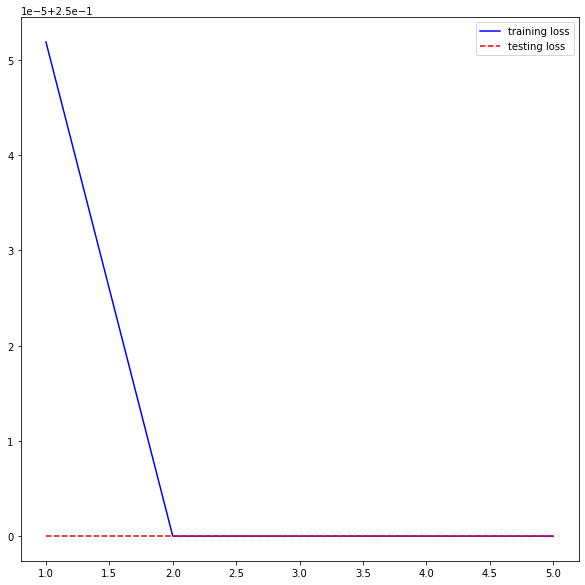

Elapsed training time: 25.99507 sec
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 5)         50        
_________________________________________________________________
re_lu (ReLU)                 (None, 26, 26, 5)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 10)        1260      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 22, 22, 10)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 10)          0         
_________________________________________________________________
activation (Activation)  

In [3]:
model = get_scalar_conv_model2(dataset_shapes, optimizer=keras.optimizers.Adam())

test_model(model, train_dataset, test_dataset, epochs=5, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### Fractal Vector ConvNet C-C-P

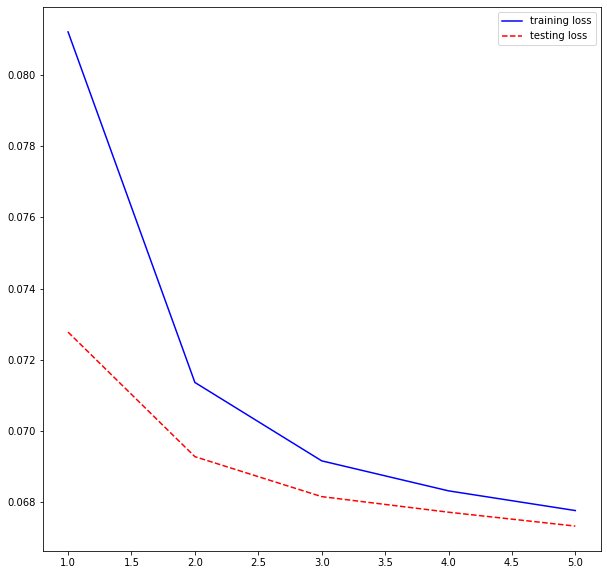

Elapsed training time: 473.76279 sec
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
v_input_conv (VInputConv)    (None, 10, 26, 26, 5)     50        
_________________________________________________________________
v_conv_fractal (VConvFractal (None, 126, 22, 22, 10)   3250      
_________________________________________________________________
v_conv (VConv)               (None, 484, 1, 1, 10)     0         
_________________________________________________________________
v_output_conv (VOutputConv)  (None, 1, 1, 10)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
Total params: 3,300
Trainable params: 3,300
Non-trainable params: 0
____________________

In [4]:
shared_inner_nets = False
model = get_vector_conv_model2(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model(model, train_dataset, test_dataset, epochs=5, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

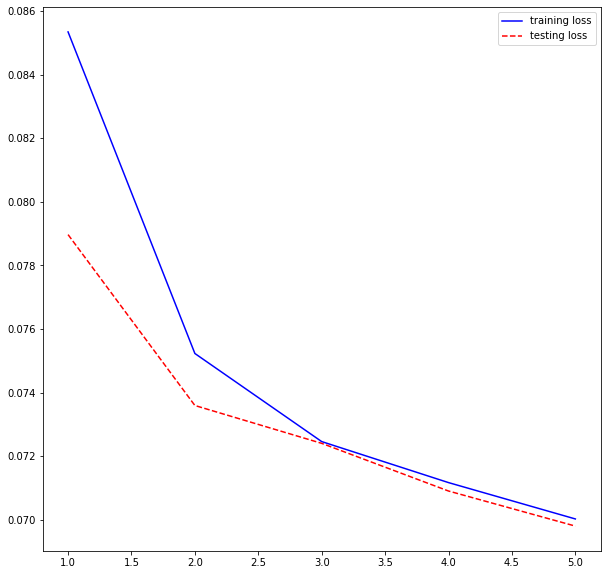

Elapsed training time: 470.23863 sec
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
v_input_conv_1 (VInputConv)  (None, 10, 26, 26, 5)     50        
_________________________________________________________________
v_conv_fractal_1 (VConvFract (None, 126, 22, 22, 10)   1658      
_________________________________________________________________
v_conv_1 (VConv)             (None, 484, 1, 1, 10)     0         
_________________________________________________________________
v_output_conv_1 (VOutputConv (None, 1, 1, 10)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
Total params: 1,708
Trainable params: 1,708
Non-trainable params: 0
____________________

In [5]:
shared_inner_nets = True
model = get_vector_conv_model2(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model(model, train_dataset, test_dataset, epochs=5, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### Simple LeNet

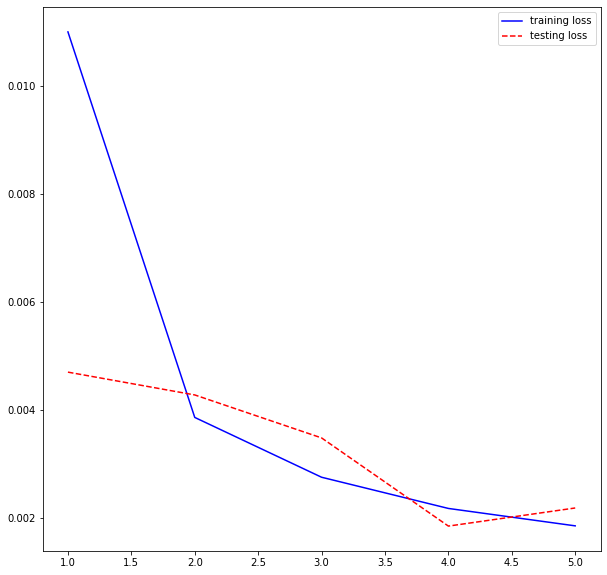

Elapsed training time: 35.96881 sec
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPoo

In [4]:
model = get_le_net_5(dataset_shapes, optimizer=keras.optimizers.Adam())

test_model(model, train_dataset, test_dataset, epochs=5, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

Average elapsed training time: 34.45519 sec
Last measures: [0.0021142789628356695, 0.0031999771017581224, 0.0022827491629868746, 0.00218329974450171, 0.0024304345715790987]


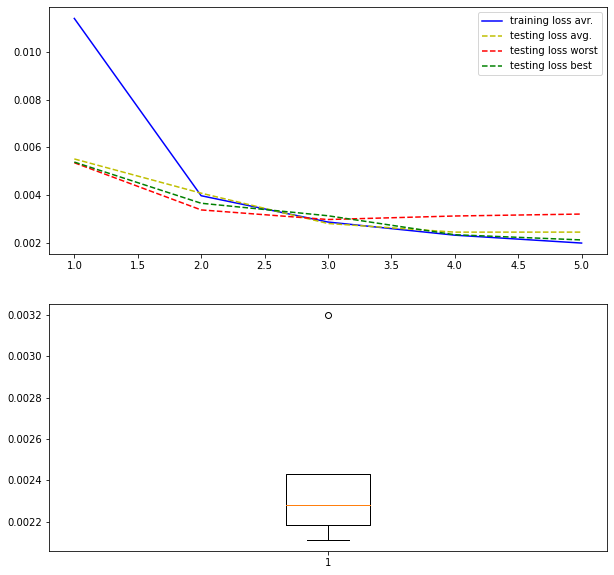

In [17]:
model_fun = lambda: get_le_net_5(dataset_shapes, optimizer=keras.optimizers.Adam())
     
test_model_multiple(model_fun, train_dataset, test_dataset, epochs=5, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### LeNet without fully connected layers

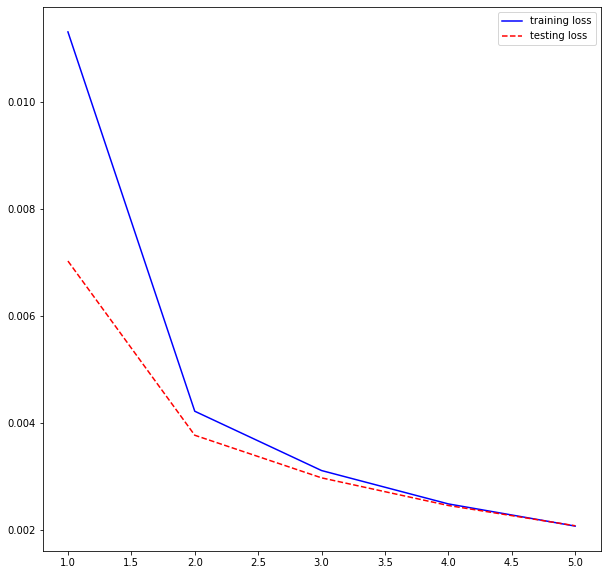

Elapsed training time: 34.69146 sec
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_5 (MaxPoo

In [5]:
model = get_le_net_5_without_fully_connected(dataset_shapes, optimizer=keras.optimizers.Adam())

test_model(model, train_dataset, test_dataset, epochs=5, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

Average elapsed training time: 32.35839 sec
Last measures: [0.002114100381731987, 0.0021936900448054075, 0.002268311334773898, 0.002720489399507642, 0.0018818608950823545]


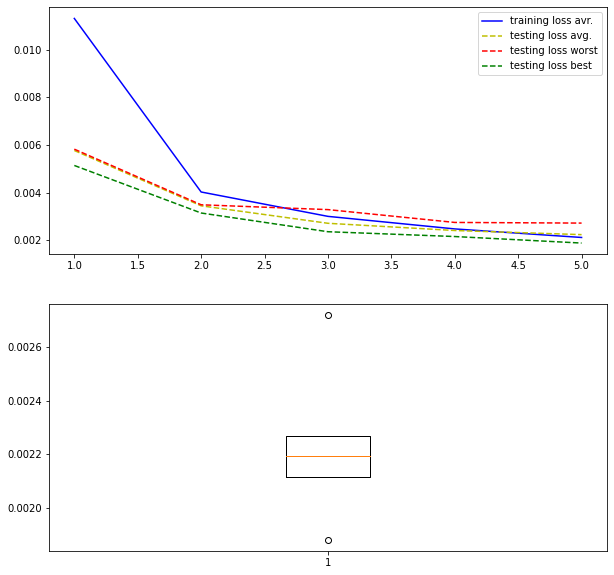

In [18]:
model_fun = lambda: get_le_net_5_without_fully_connected(dataset_shapes, optimizer=keras.optimizers.Adam())
     
test_model_multiple(model_fun, train_dataset, test_dataset, epochs=5, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### LeNet with fractal C1

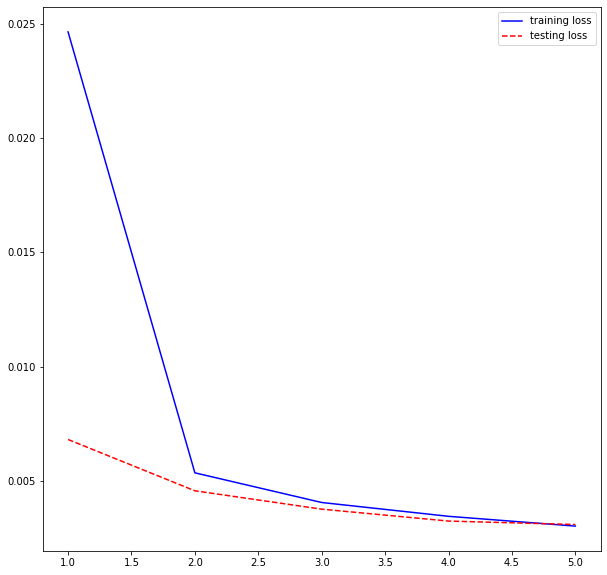

Elapsed training time: 181.33297 sec
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 32, 32, 1)         0         
_________________________________________________________________
v_input_conv_2 (VInputConv)  (None, 26, 28, 28, 6)     156       
_________________________________________________________________
v_conv_fractal_2 (VConvFract (None, 4, 14, 14, 6)      384       
_________________________________________________________________
v_output_conv_2 (VOutputConv (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPo

In [6]:
shared_inner_nets = False
model = get_le_net_5_fractal1(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model(model, train_dataset, test_dataset, epochs=5, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

Average elapsed training time: 180.10109 sec
Last measures: [0.0029399413615465164, 0.0044353678822517395, 0.0027826966252177954, 0.0033251948188990355, 0.0032846268732100725]


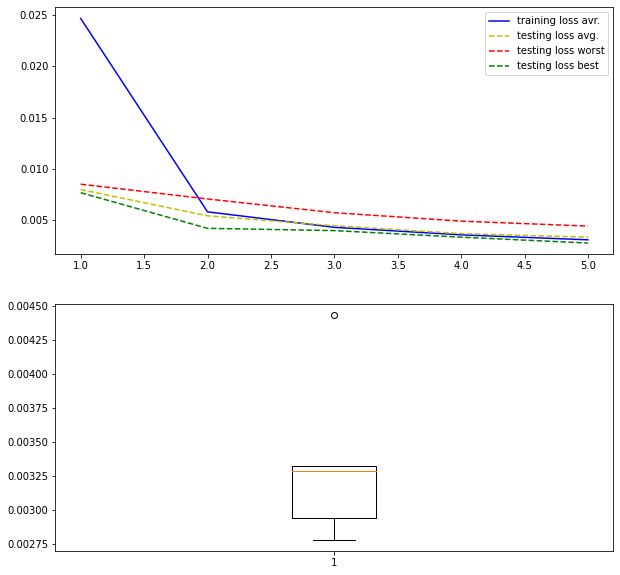

In [21]:
shared_inner_nets = False
model_fun = lambda: get_le_net_5_fractal1(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())
     
test_model_multiple(model_fun, train_dataset, test_dataset, epochs=5, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

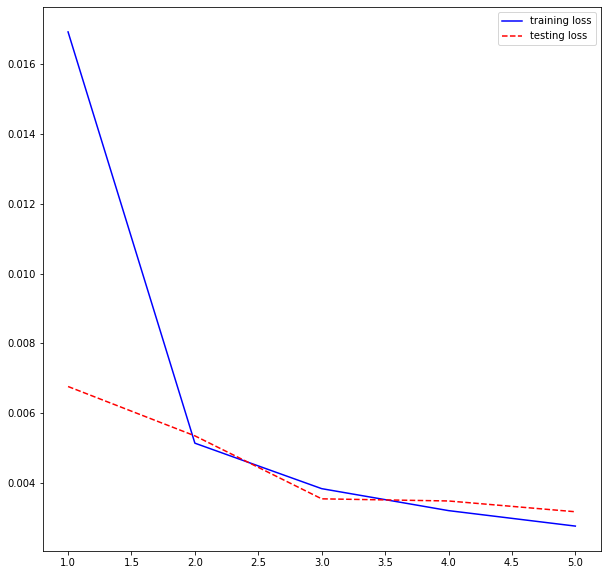

Elapsed training time: 181.09808 sec
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
v_input_conv_3 (VInputConv)  (None, 26, 28, 28, 6)     156       
_________________________________________________________________
v_conv_fractal_3 (VConvFract (None, 4, 14, 14, 6)      64        
_________________________________________________________________
v_output_conv_3 (VOutputConv (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPo

In [7]:
shared_inner_nets = True
model = get_le_net_5_fractal1(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model(model, train_dataset, test_dataset, epochs=5, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

Average elapsed training time: 181.01755 sec
Last measures: [0.0032495143823325634, 0.08997131139039993, 0.0028403569012880325, 0.08997131139039993, 0.08997129648923874]


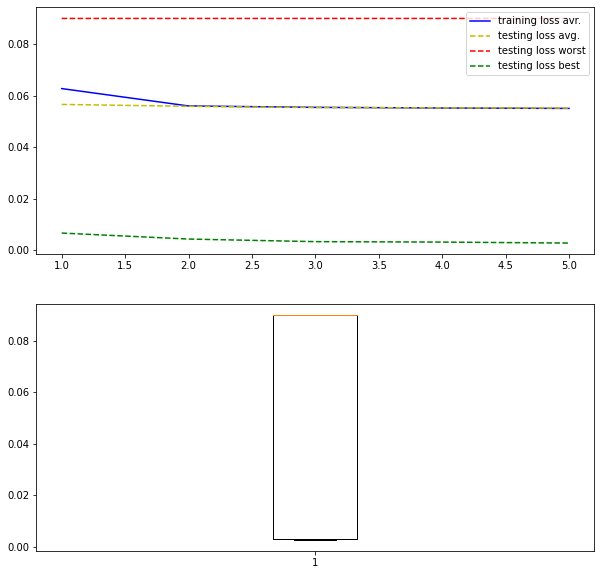

In [22]:
shared_inner_nets = True
model_fun = lambda: get_le_net_5_fractal1(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())
     
test_model_multiple(model_fun, train_dataset, test_dataset, epochs=5, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### LeNet with fractal C2

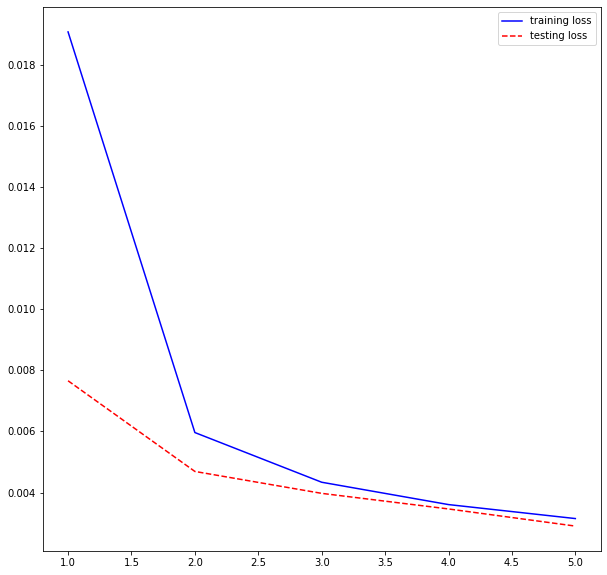

Elapsed training time: 316.81862 sec
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
v_input_conv_4 (VInputConv)  (None, 151, 10, 10, 16)   2416      
_________________________________________________________________
v_conv_fractal_4 (VCon

In [8]:
shared_inner_nets = False
model = get_le_net_5_fractal2(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model(model, train_dataset, test_dataset, epochs=5, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

Average elapsed training time: 358.75371 sec
Last measures: [0.0031380760483443737, 0.004443153273314238, 0.0038384899962693453, 0.003192214760929346, 0.004393978975713253]


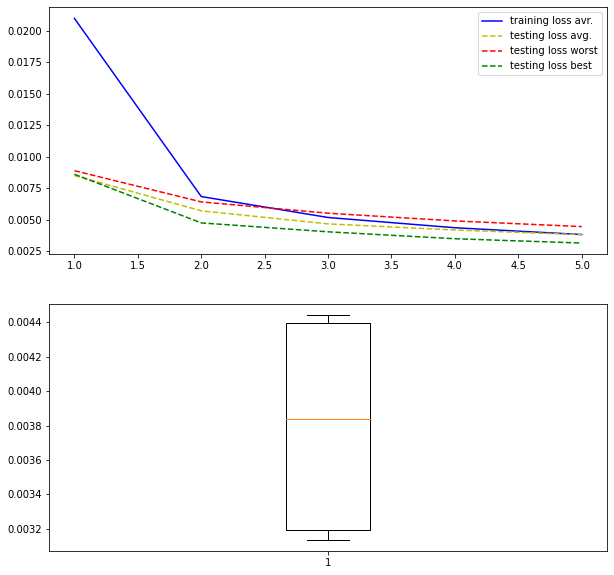

In [24]:
shared_inner_nets = False
model_fun = lambda: get_le_net_5_fractal2(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())
     
test_model_multiple(model_fun, train_dataset, test_dataset, epochs=5, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

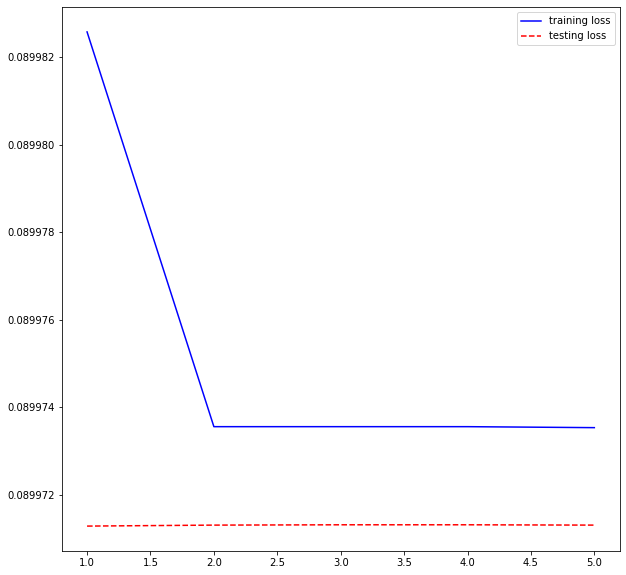

Elapsed training time: 317.93278 sec
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
v_input_conv_5 (VInputConv)  (None, 151, 10, 10, 16)   2416      
_________________________________________________________________
v_conv_fractal_5 (VCon

In [9]:
shared_inner_nets = True
model = get_le_net_5_fractal2(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model(model, train_dataset, test_dataset, epochs=5, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

Average elapsed training time: 380.98295 sec
Last measures: [0.002904183929786086, 0.0026547315064817667, 0.002814971376210451, 0.002700270153582096, 0.08997130393981934]


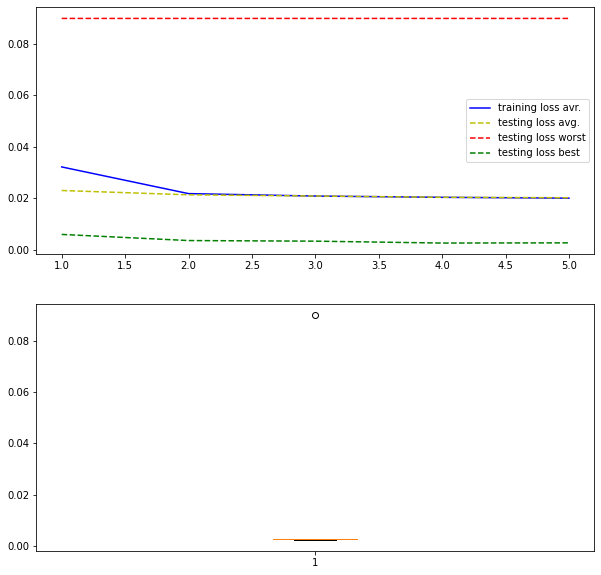

In [25]:
shared_inner_nets = True
model_fun = lambda: get_le_net_5_fractal2(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())
     
test_model_multiple(model_fun, train_dataset, test_dataset, epochs=5, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### Fully fractal LeNet

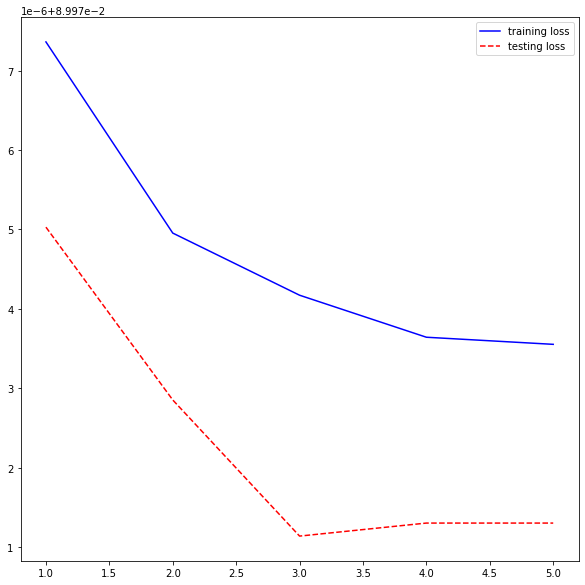

Elapsed training time: 469.23277 sec
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
zero_padding2d_5 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
v_input_conv_7 (VInputConv)  (None, 26, 28, 28, 6)     156       
_________________________________________________________________
v_conv_fractal_8 (VConvFract (None, 4, 14, 14, 6)      384       
_________________________________________________________________
v_conv_4 (VConv)             (None, 151, 10, 10, 16)   2416      
_________________________________________________________________
v_conv_fractal_9 (VConvFract (None, 4, 5, 5, 16)       5024      
_________________________________________________________________
v_conv_5 (VConv)      

In [12]:
shared_inner_nets = False
model = get_le_net_5_fractal5(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model(model, train_dataset, test_dataset, epochs=5, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

Average elapsed training time: 470.51839 sec
Last measures: [0.015668030828237534, 0.006744560785591602, 0.005987438373267651, 0.08997130393981934, 0.08997129648923874]


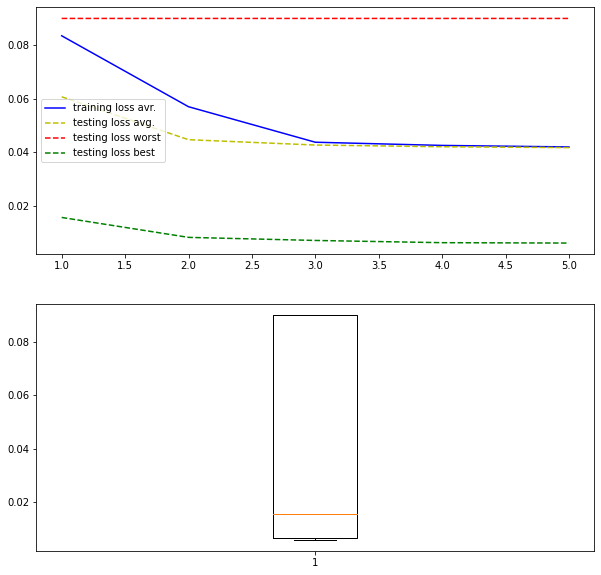

In [19]:
shared_inner_nets = False
model_fun = lambda: get_le_net_5_fractal5(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())
     
test_model_multiple(model_fun, train_dataset, test_dataset, epochs=5, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

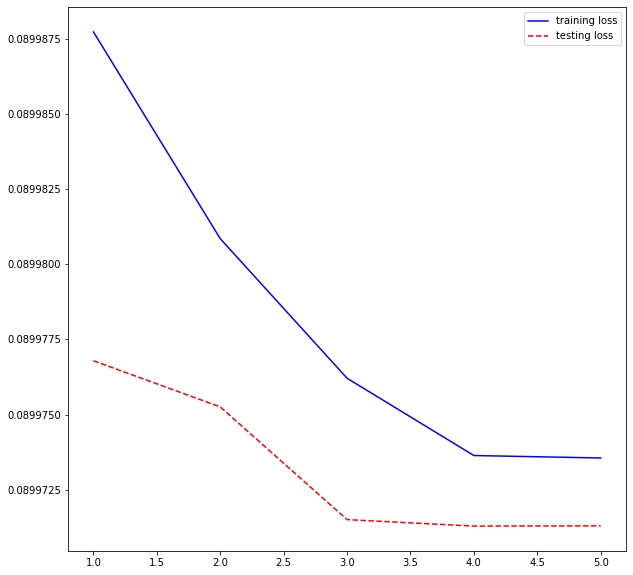

Elapsed training time: 470.78301 sec
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
zero_padding2d_6 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
v_input_conv_8 (VInputConv)  (None, 26, 28, 28, 6)     156       
_________________________________________________________________
v_conv_fractal_10 (VConvFrac (None, 4, 14, 14, 6)      64        
_________________________________________________________________
v_conv_6 (VConv)             (None, 151, 10, 10, 16)   2416      
_________________________________________________________________
v_conv_fractal_11 (VConvFrac (None, 4, 5, 5, 16)       314       
_________________________________________________________________
v_conv_7 (VConv)      

In [13]:
shared_inner_nets = True
model = get_le_net_5_fractal5(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model(model, train_dataset, test_dataset, epochs=5, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

Average elapsed training time: 469.30665 sec
Last measures: [0.08997131139039993, 0.08997130393981934, 0.08997130393981934, 0.08997130393981934, 0.08997130393981934]


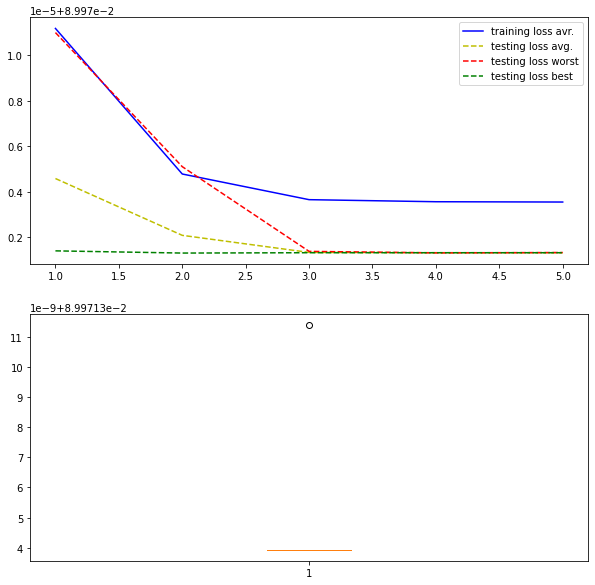

In [20]:
shared_inner_nets = True
model_fun = lambda: get_le_net_5_fractal5(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())
     
test_model_multiple(model_fun, train_dataset, test_dataset, epochs=5, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### Fully fractal LeNet without pooling

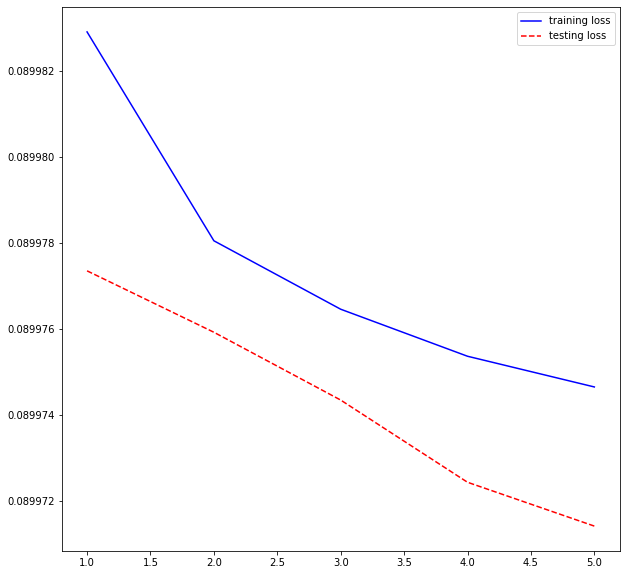

Elapsed training time: 608.38753 sec
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
zero_padding2d_7 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
v_input_conv_9 (VInputConv)  (None, 26, 28, 28, 6)     156       
_________________________________________________________________
v_conv_fractal_12 (VConvFrac (None, 25, 14, 14, 6)     912       
_________________________________________________________________
v_conv_8 (VConv)             (None, 151, 10, 10, 16)   2416      
_________________________________________________________________
v_conv_fractal_13 (VConvFrac (None, 65, 5, 5, 16)      8992      
_________________________________________________________________
v_conv_9 (VConv)     

In [14]:
shared_inner_nets = False
model = get_le_net_5_fractal6(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model(model, train_dataset, test_dataset, epochs=5, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

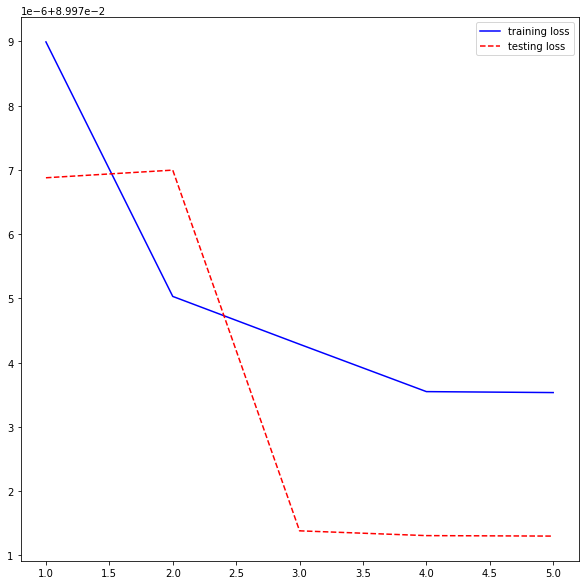

Elapsed training time: 612.35103 sec
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
zero_padding2d_8 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
v_input_conv_10 (VInputConv) (None, 26, 28, 28, 6)     156       
_________________________________________________________________
v_conv_fractal_14 (VConvFrac (None, 25, 14, 14, 6)     277       
_________________________________________________________________
v_conv_10 (VConv)            (None, 151, 10, 10, 16)   2416      
_________________________________________________________________
v_conv_fractal_15 (VConvFrac (None, 65, 5, 5, 16)      1537      
_________________________________________________________________
v_conv_11 (VConv)    

In [15]:
shared_inner_nets = True
model = get_le_net_5_fractal6(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model(model, train_dataset, test_dataset, epochs=5, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)